In [1]:
# Mutual information between two variables is a measure of the extent to which
# knowledge of one variable reduces uncertainty about the other

import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
import numpy as np

plt.rcParams['figure.dpi'] = 300
sns.set_theme(font_scale = 0.75)
sns.set_style('whitegrid')


df = pd.read_csv('./data/autos.csv')
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [2]:
X = df.copy()
y = X.pop('price')

for colname in X.select_dtypes('object'):
    X[colname], _ = X[colname].factorize()
    
discrete_features = (X.dtypes == int)

In [3]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features = discrete_features)
    mi_scores = pd.Series(mi_scores, name = 'MI Scores', index = X.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

curb_weight          1.474198
horsepower           1.252300
engine_size          0.996600
highway_mpg          0.954760
city_mpg             0.860656
width                0.685066
length               0.605176
wheel_base           0.592267
make                 0.544912
fuel_system          0.484990
bore                 0.479988
peak_rpm             0.450247
stroke               0.383644
height               0.355087
drive_wheels         0.332973
num_of_cylinders     0.330988
symboling            0.228842
engine_type          0.151544
compression_ratio    0.132774
aspiration           0.087994
body_style           0.079308
fuel_type            0.048139
engine_location      0.035329
num_of_doors         0.011409
Name: MI Scores, dtype: float64

<AxesSubplot:xlabel='MI Scores', ylabel='index'>

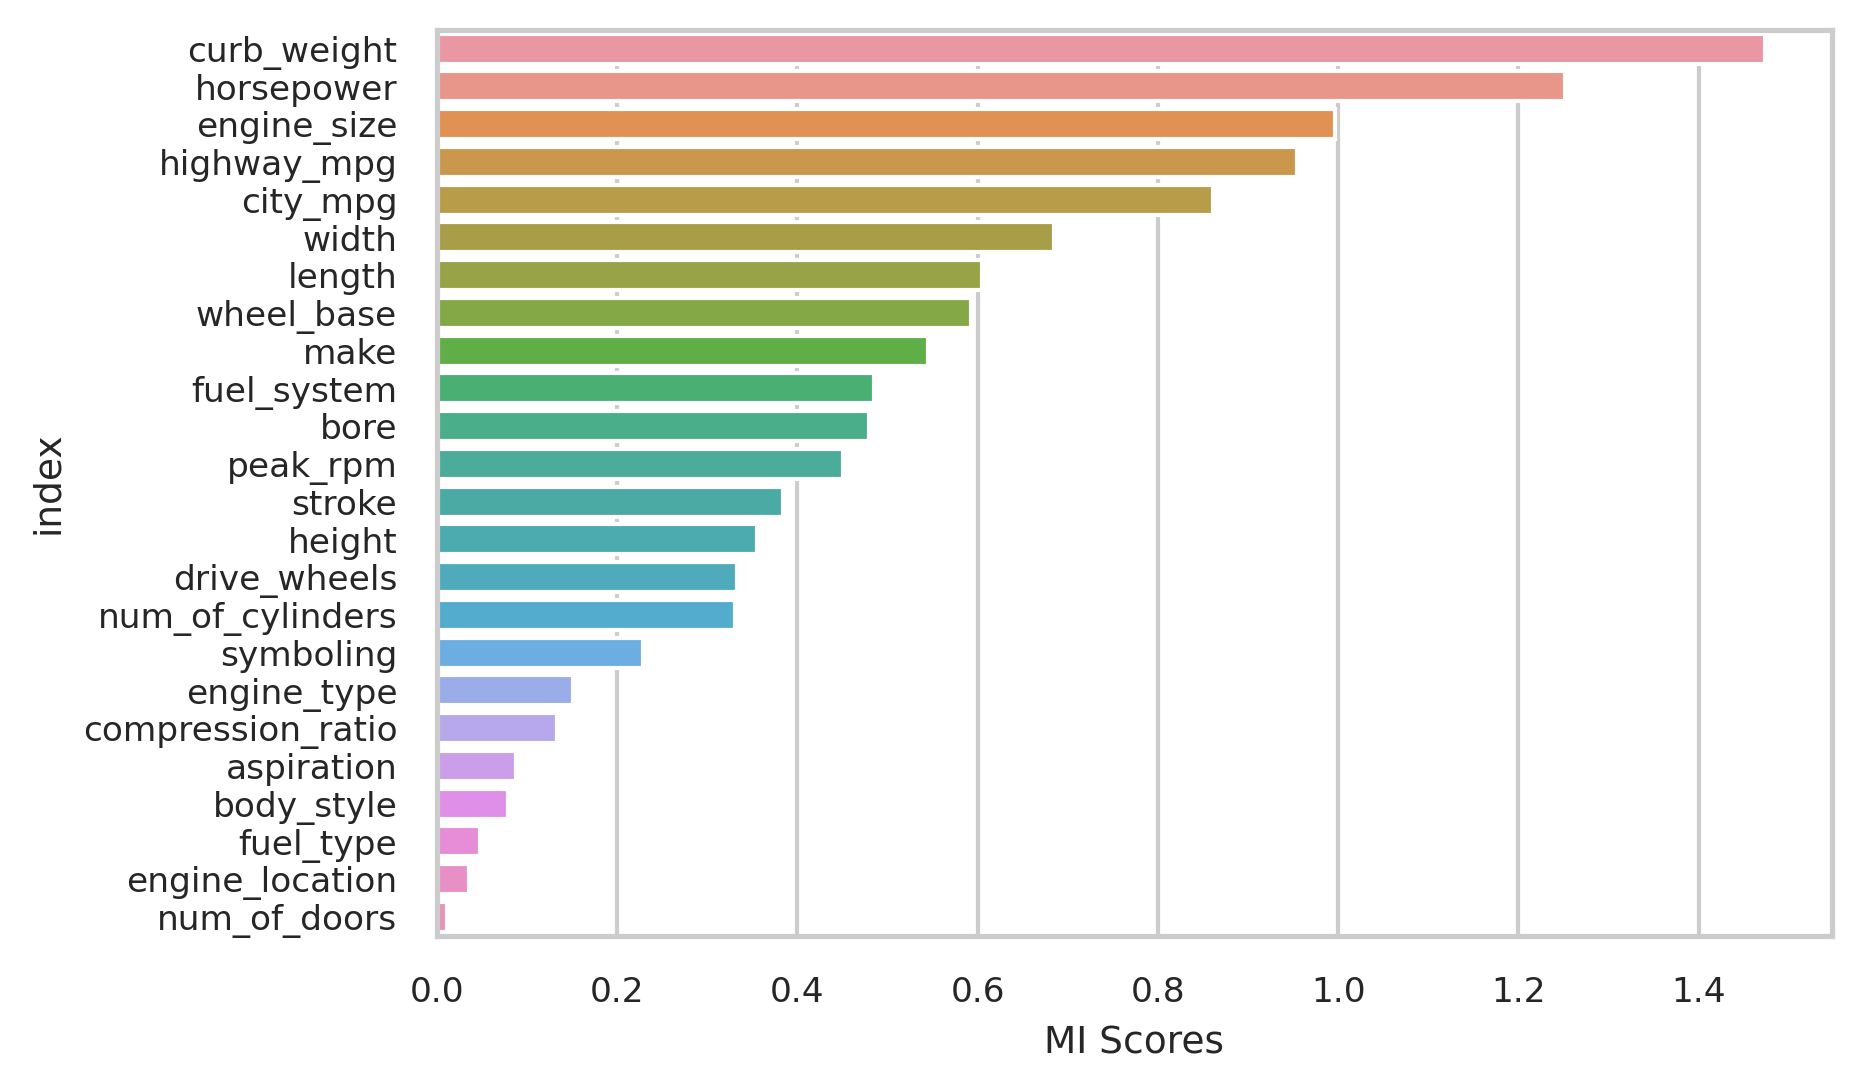

In [4]:
# sns.set(font_scale = 0.75)
sns.barplot(data = mi_scores.sort_values(ascending = False).reset_index(),
            y = 'index', x = 'MI Scores')
# sns.set(font_scale = 1)

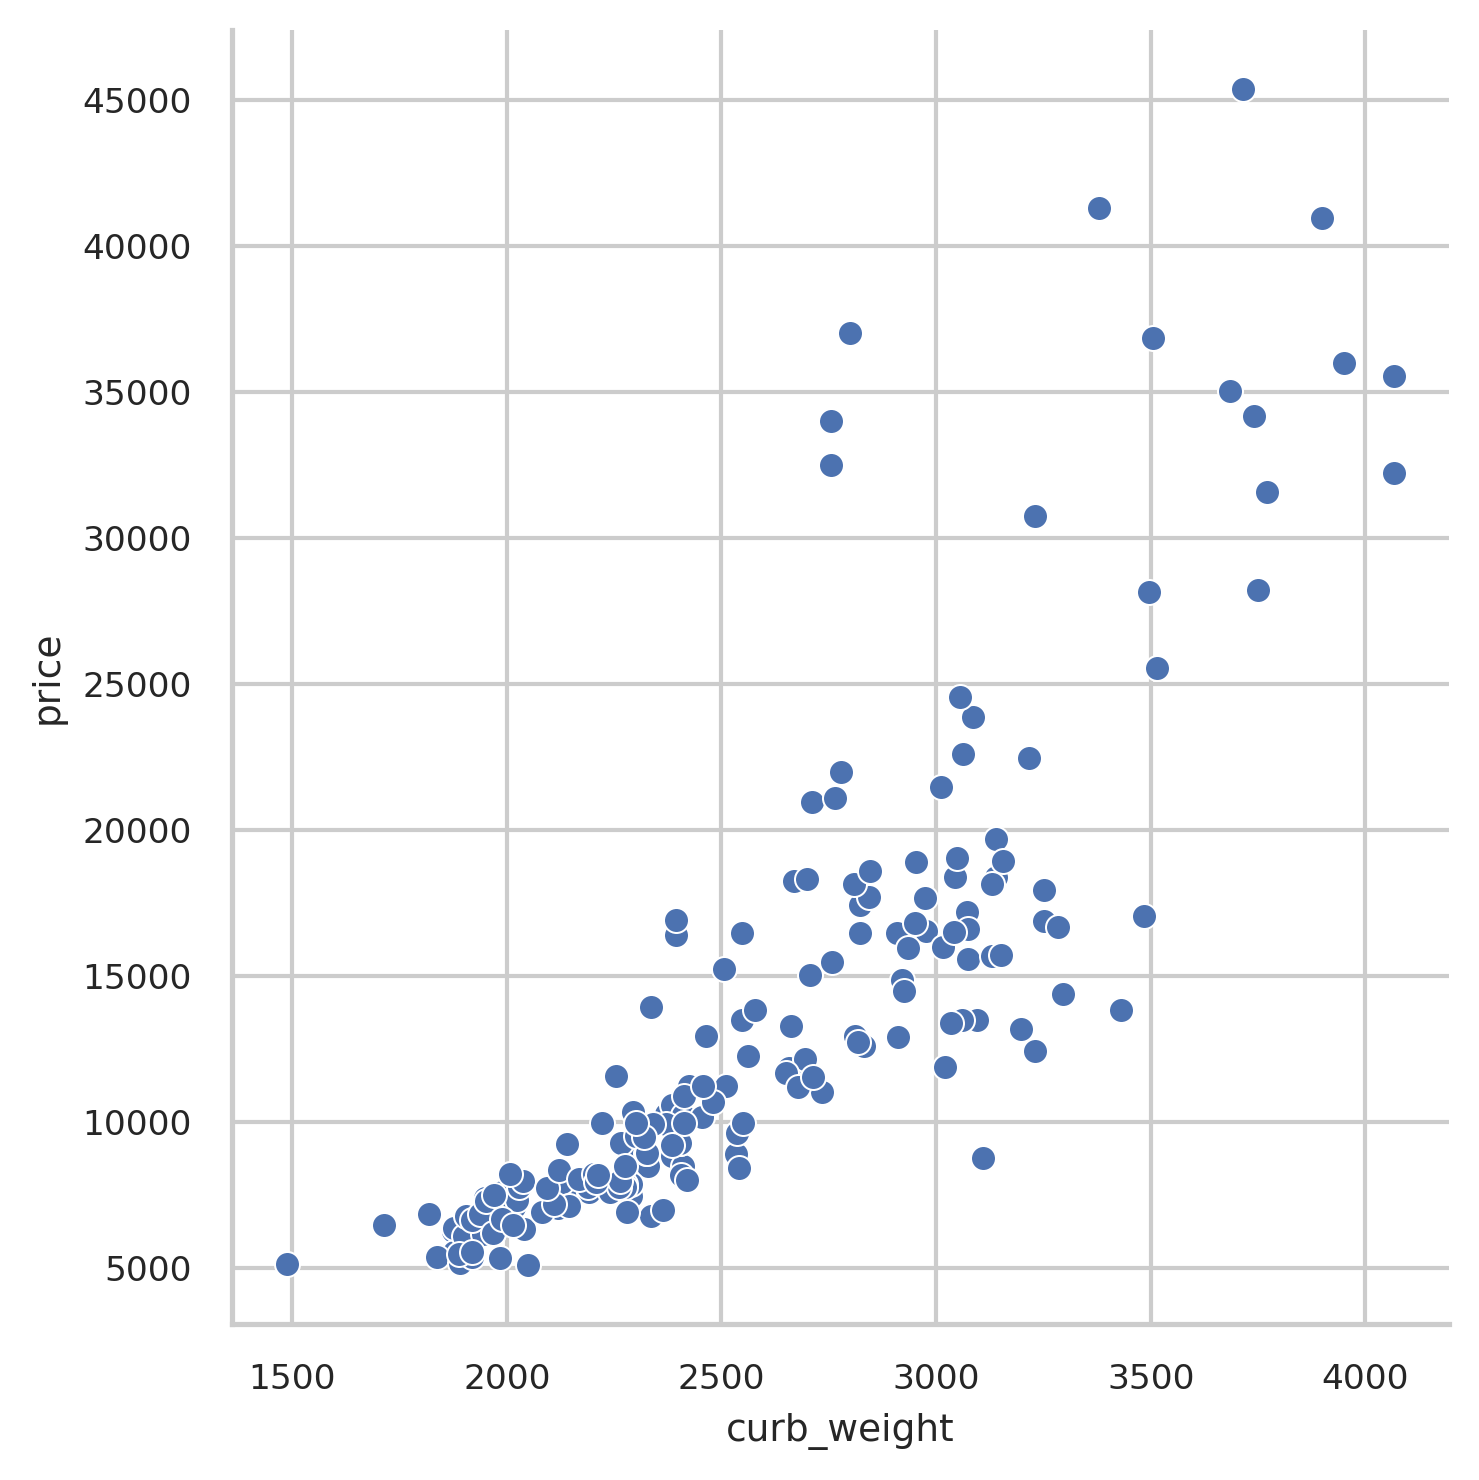

In [5]:
sns.relplot(data = df, x = 'curb_weight', y = 'price')

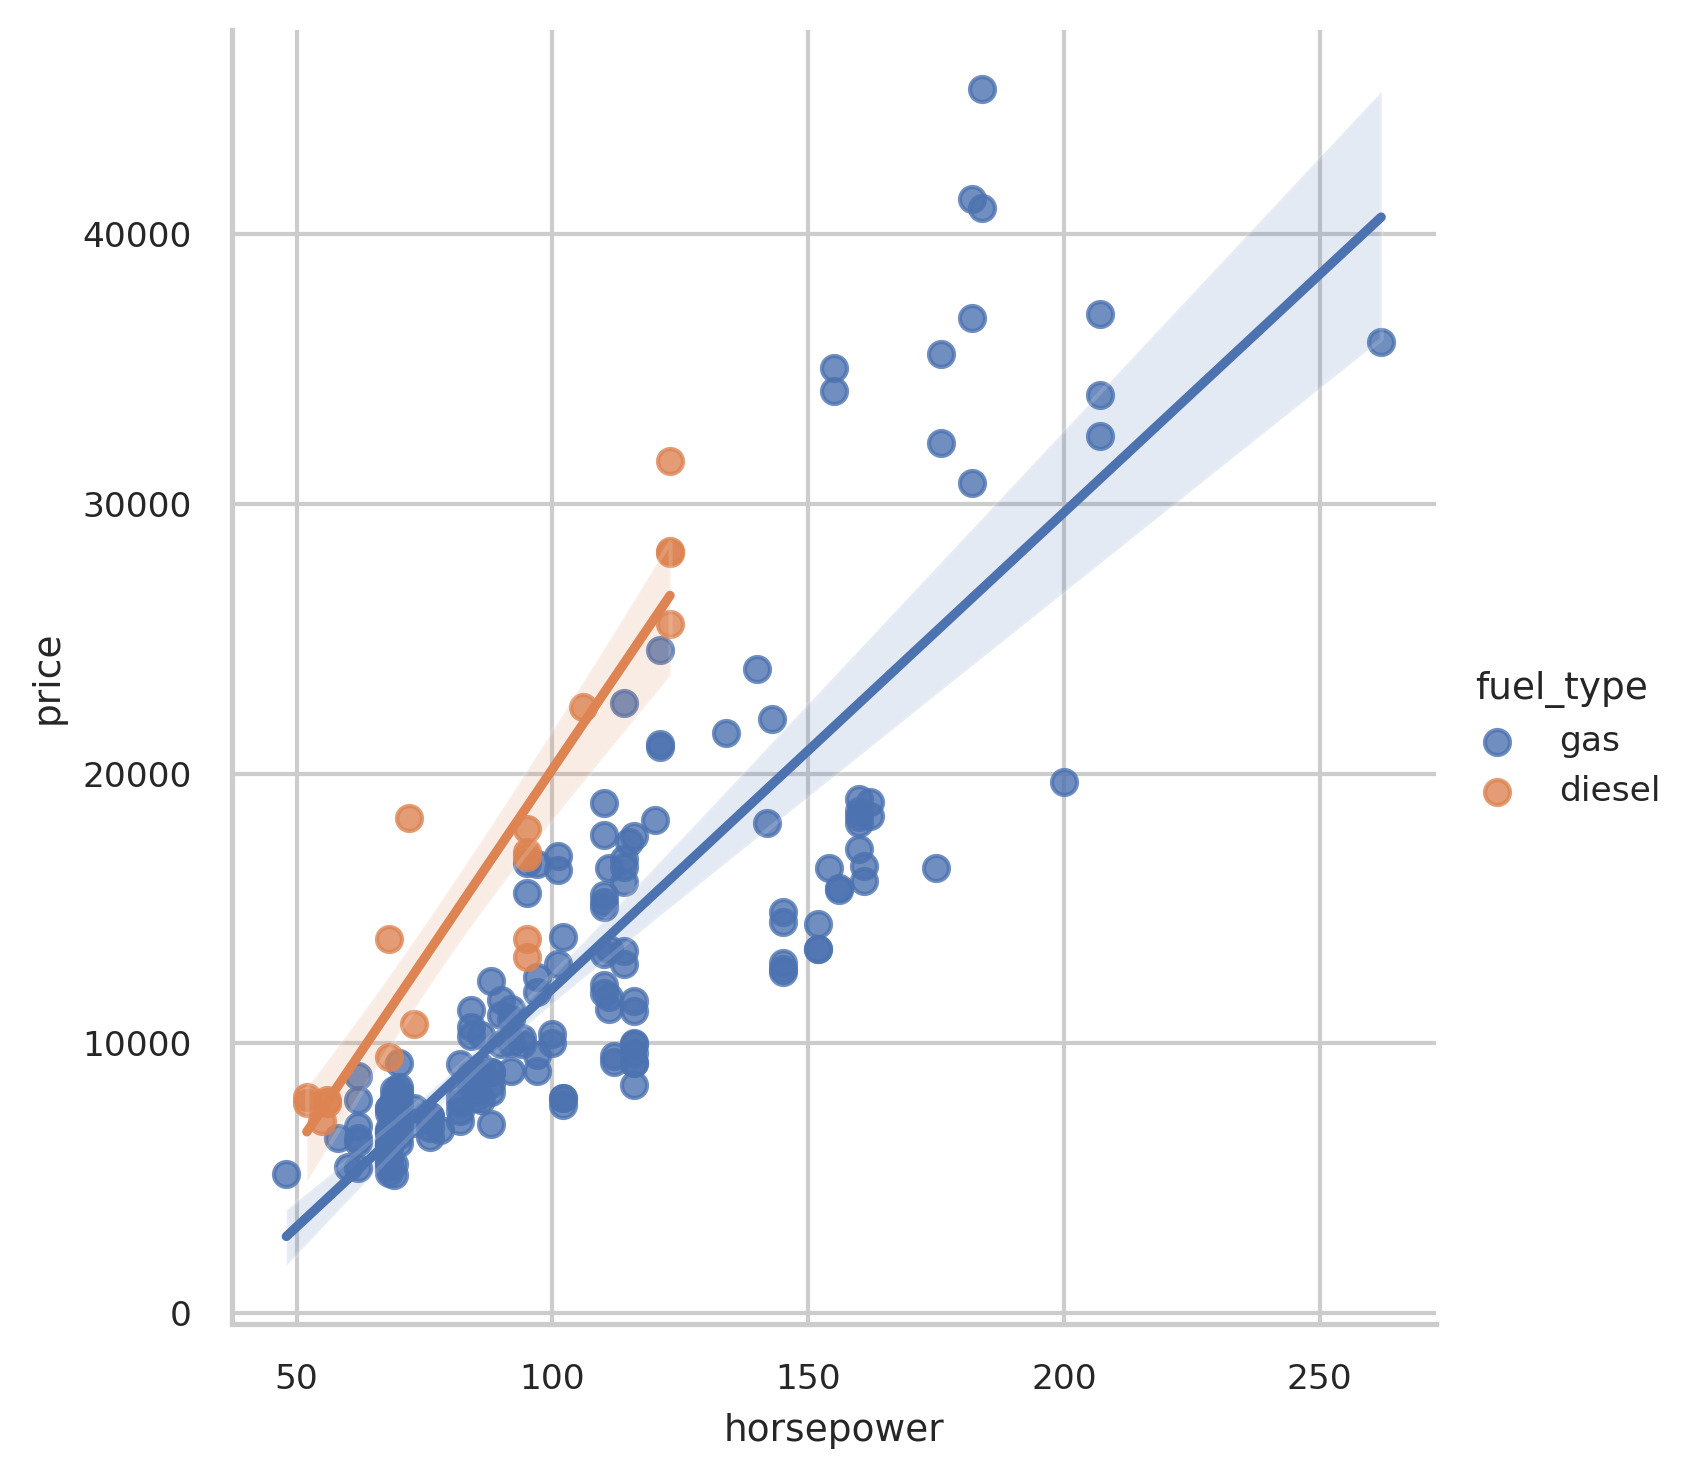

In [18]:
# fuel type seems unimportant, but

sns.lmplot(data = df,
           x = 'horsepower', y = 'price', hue = 'fuel_type', ci = 95, n_boot = 100000)